In [1]:
import zstandard as zstd
import json
import os

# 修改為你的檔案路徑
zst_path = "dat/reddit/subreddits24/nfl_submissions.zst"

# 設定你要預覽幾筆資料（可自行調整）
PREVIEW_LIMIT = 10

# 逐行讀取與解析 zst 中的 JSON lines
def preview_zst_file(path, limit=10):
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        return

    with open(path, 'rb') as f:
        dctx = zstd.ZstdDecompressor()
        with dctx.stream_reader(f) as reader:
            buffer = b""
            count = 0

            for chunk in iter(lambda: reader.read(8192), b""):
                buffer += chunk
                while b"\n" in buffer:
                    line, buffer = buffer.split(b"\n", 1)
                    try:
                        obj = json.loads(line.decode("utf-8"))
                        print(json.dumps(obj, indent=2))  # 印出完整 JSON 結構
                        count += 1
                        if count >= limit:
                            print("\n✅ Preview done.")
                            return
                    except Exception as e:
                        print(f"⚠️ Error parsing line: {e}")

if __name__ == "__main__":
    preview_zst_file(zst_path, PREVIEW_LIMIT)


{
  "archived": true,
  "author": "[deleted]",
  "author_flair_background_color": "",
  "author_flair_css_class": null,
  "author_flair_text": null,
  "author_flair_text_color": "dark",
  "brand_safe": true,
  "can_gild": false,
  "contest_mode": false,
  "created_utc": 1221645613,
  "distinguished": null,
  "domain": "my-coliseum.com",
  "edited": false,
  "gilded": 0,
  "hidden": false,
  "hide_score": false,
  "id": "71woa",
  "is_crosspostable": true,
  "is_reddit_media_domain": false,
  "is_self": false,
  "is_video": false,
  "link_flair_css_class": null,
  "link_flair_richtext": [],
  "link_flair_text": null,
  "link_flair_text_color": "dark",
  "link_flair_type": "text",
  "locked": false,
  "media": null,
  "media_embed": {},
  "no_follow": true,
  "num_comments": 0,
  "num_crossposts": 0,
  "over_18": false,
  "parent_whitelist_status": "all_ads",
  "permalink": "/r/nfl/comments/71woa/how_and_why_the_seahawks_will_still_win_10_games/",
  "retrieved_on": 1522705862,
  "rte_mod

In [2]:
import zstandard as zstd
import json
import os

zst_path = "dat/reddit/subreddits24/nfl_submissions.zst"
PREVIEW_LIMIT = 100  # 用多一點筆數確保收集完整欄位

def collect_all_columns(path, limit=100):
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        return

    all_keys = set()
    with open(path, 'rb') as f:
        dctx = zstd.ZstdDecompressor()
        with dctx.stream_reader(f) as reader:
            buffer = b""
            count = 0

            for chunk in iter(lambda: reader.read(8192), b""):
                buffer += chunk
                while b"\n" in buffer:
                    line, buffer = buffer.split(b"\n", 1)
                    try:
                        obj = json.loads(line.decode("utf-8"))
                        all_keys.update(obj.keys())  # 收集欄位名稱
                        count += 1
                        if count >= limit:
                            print(f"\n✅ Collected from {count} records.")
                            print(f"\n🗂️ Columns found ({len(all_keys)}):\n")
                            for key in sorted(all_keys):
                                print("-", key)
                            return
                    except Exception as e:
                        print(f"⚠️ Error parsing line: {e}")

if __name__ == "__main__":
    collect_all_columns(zst_path, PREVIEW_LIMIT)



✅ Collected from 100 records.

🗂️ Columns found (57):

- archived
- author
- author_flair_background_color
- author_flair_css_class
- author_flair_richtext
- author_flair_text
- author_flair_text_color
- author_flair_type
- brand_safe
- can_gild
- contest_mode
- created_utc
- distinguished
- domain
- edited
- gilded
- hidden
- hide_score
- id
- is_crosspostable
- is_reddit_media_domain
- is_self
- is_video
- link_flair_css_class
- link_flair_richtext
- link_flair_text
- link_flair_text_color
- link_flair_type
- locked
- media
- media_embed
- no_follow
- num_comments
- num_crossposts
- over_18
- parent_whitelist_status
- permalink
- retrieved_on
- rte_mode
- score
- secure_media
- secure_media_embed
- selftext
- send_replies
- spoiler
- stickied
- subreddit
- subreddit_id
- subreddit_name_prefixed
- subreddit_type
- suggested_sort
- thumbnail
- thumbnail_height
- thumbnail_width
- title
- url
- whitelist_status


In [3]:
import zstandard as zstd
import json
import os

# 修改為你的檔案路徑
zst_path = "dat/reddit/subreddits24/nfl_submissions.zst"
PREVIEW_LIMIT = 100  # 讀取前 N 筆資料用來找出所有欄位

def collect_all_columns(path, limit=100):
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        return

    all_keys = set()
    with open(path, 'rb') as f:
        dctx = zstd.ZstdDecompressor()
        with dctx.stream_reader(f) as reader:
            buffer = b""
            count = 0

            for chunk in iter(lambda: reader.read(8192), b""):
                buffer += chunk
                while b"\n" in buffer:
                    line, buffer = buffer.split(b"\n", 1)
                    try:
                        obj = json.loads(line.decode("utf-8"))
                        all_keys.update(obj.keys())
                        count += 1
                        if count >= limit:
                            print(f"\n✅ Collected from {count} records.")
                            
                            # ✅ 一口氣列出所有欄位（不省略）
                            print(f"\n🗂️ Columns found ({len(all_keys)}):\n")
                            print("\n".join(f"- {col}" for col in sorted(all_keys)))

                            # ✅ 儲存到 txt 檔案
                            with open("nfl_submission_columns.txt", "w", encoding="utf-8") as out:
                                for col in sorted(all_keys):
                                    out.write(col + "\n")
                            print("\n📁 Column list saved to: nfl_submission_columns.txt")
                            return
                    except Exception as e:
                        print(f"⚠️ Error parsing line: {e}")

if __name__ == "__main__":
    collect_all_columns(zst_path, PREVIEW_LIMIT)



✅ Collected from 100 records.

🗂️ Columns found (57):

- archived
- author
- author_flair_background_color
- author_flair_css_class
- author_flair_richtext
- author_flair_text
- author_flair_text_color
- author_flair_type
- brand_safe
- can_gild
- contest_mode
- created_utc
- distinguished
- domain
- edited
- gilded
- hidden
- hide_score
- id
- is_crosspostable
- is_reddit_media_domain
- is_self
- is_video
- link_flair_css_class
- link_flair_richtext
- link_flair_text
- link_flair_text_color
- link_flair_type
- locked
- media
- media_embed
- no_follow
- num_comments
- num_crossposts
- over_18
- parent_whitelist_status
- permalink
- retrieved_on
- rte_mode
- score
- secure_media
- secure_media_embed
- selftext
- send_replies
- spoiler
- stickied
- subreddit
- subreddit_id
- subreddit_name_prefixed
- subreddit_type
- suggested_sort
- thumbnail
- thumbnail_height
- thumbnail_width
- title
- url
- whitelist_status

📁 Column list saved to: nfl_submission_columns.txt


In [7]:
import zstandard as zstd
import json
import os
from datetime import datetime

# 原始檔案
input_path = "dat/reddit/subreddits24/nfl_submissions.zst"

# 輸出檔案
output_path = "dat/reddit_2018_2023.jsonl"

# 建立資料夾
os.makedirs("dat", exist_ok=True)

# 設定年份範圍
MIN_YEAR = 2018
MAX_YEAR = 2023

# 記錄幾筆
written = 0

with open(input_path, 'rb') as f_in, open(output_path, 'w', encoding='utf-8') as f_out:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(f_in) as reader:
        buffer = b""
        for chunk in iter(lambda: reader.read(8192), b""):
            buffer += chunk
            while b"\n" in buffer:
                line, buffer = buffer.split(b"\n", 1)
                try:
                    obj = json.loads(line.decode('utf-8'))

                    # 轉換 timestamp 成年
                    year = datetime.utcfromtimestamp(obj.get("created_utc", 0)).year
                    if MIN_YEAR <= year <= MAX_YEAR:
                        f_out.write(json.dumps(obj) + "\n")
                        written += 1
                        if written % 10000 == 0:
                            print(f"✅ Saved {written} records so far...")

                except Exception as e:
                    continue

print(f"\n🎉 Done! Total records written: {written}")
print(f"📁 Output saved to: {output_path}")


C:\Users\Shang Yi Lin\AppData\Local\Temp\ipykernel_16444\942641142.py:34: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  year = datetime.utcfromtimestamp(obj.get("created_utc", 0)).year


✅ Saved 10000 records so far...
✅ Saved 20000 records so far...
✅ Saved 30000 records so far...
✅ Saved 40000 records so far...
✅ Saved 50000 records so far...
✅ Saved 60000 records so far...
✅ Saved 70000 records so far...
✅ Saved 80000 records so far...
✅ Saved 90000 records so far...
✅ Saved 100000 records so far...
✅ Saved 110000 records so far...
✅ Saved 120000 records so far...
✅ Saved 130000 records so far...
✅ Saved 140000 records so far...
✅ Saved 150000 records so far...
✅ Saved 160000 records so far...
✅ Saved 170000 records so far...
✅ Saved 180000 records so far...
✅ Saved 190000 records so far...
✅ Saved 200000 records so far...
✅ Saved 210000 records so far...
✅ Saved 220000 records so far...
✅ Saved 230000 records so far...
✅ Saved 240000 records so far...
✅ Saved 250000 records so far...
✅ Saved 260000 records so far...
✅ Saved 270000 records so far...
✅ Saved 280000 records so far...
✅ Saved 290000 records so far...
✅ Saved 300000 records so far...
✅ Saved 310000 reco

In [8]:
import pandas as pd

df = pd.read_json("dat/reddit_2018_2023.jsonl", lines=True)


In [9]:
print(df.shape)           # 看看總共有幾筆貼文、欄位數量
print(df.columns.tolist())  # 所有欄位名稱
df.head()                 # 前幾筆資料檢查一下


(688324, 130)
['archived', 'author', 'author_flair_css_class', 'author_flair_text', 'brand_safe', 'contest_mode', 'created_utc', 'distinguished', 'domain', 'edited', 'gilded', 'hidden', 'hide_score', 'id', 'is_crosspostable', 'is_reddit_media_domain', 'is_self', 'is_video', 'link_flair_css_class', 'link_flair_text', 'locked', 'media', 'media_embed', 'num_comments', 'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'post_hint', 'preview', 'retrieved_on', 'score', 'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id', 'subreddit_type', 'suggested_sort', 'thumbnail', 'thumbnail_height', 'thumbnail_width', 'title', 'url', 'whitelist_status', 'author_cakeday', 'crosspost_parent', 'crosspost_parent_list', 'no_follow', 'send_replies', 'approved_by', 'author_flair_background_color', 'author_flair_template_id', 'author_flair_text_color', 'banned_by', 'can_gild', 'category', 'clicked', 'content_categories', 'created', 'd

,archived,author,author_flair_css_class,author_flair_text,brand_safe,contest_mode,created_utc,distinguished,domain,edited,...,call_to_action,approved_at_utc,author_is_blocked,banned_at_utc,mod_note,mod_reason_by,mod_reason_title,updated_on,previous_selftext,_meta
0,0.0,WheresHarveyDent,saints bandwagon,Saints - Bandwagon,1.0,False,1514765120,None,es.pn,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,[deleted],None,None,1.0,False,1514765293,None,streamable.com,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,Stingerr,cardinals,Cardinals,1.0,False,1514765361,None,twitter.com,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,[deleted],None,None,1.0,False,1514765434,None,self.nfl,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,CrankDatSpookyBoi,None,None,1.0,False,1514765457,None,twitter.com,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
useful_columns = [
    "id",               # 貼文識別
    "title",            # 標題 → 可做 NLP
    "selftext",         # 內文 → 可做 NLP
    "created_utc",      # 發文時間
    "score",            # 分數（upvotes）
    "num_comments",     # 留言數
    "subreddit",        # 子版名稱（預設應為 nfl）
    "author",           # 作者帳號
    "author_flair_text",# 作者身分（例如球隊）
    "link_flair_text",  # 貼文標籤（News, Game Thread...）
    "is_self",          # 是否純文字
    "is_video",         # 是否為影片
    "spoiler",          # 是否為爆雷
    "stickied",         # 是否為置頂
    "locked"            # 是否被鎖定留言
]
# 選取欄位（有些可能缺，先用 intersect）
existing_cols = [col for col in useful_columns if col in df.columns]
df_useful = df[existing_cols]

# 儲存為 CSV
df_useful.to_csv("dat/reddit_useful_2018_2023.csv", index=False, encoding="utf-8")

print(f"✅ Done! Saved to: dat/reddit_useful_2018_2023.csv")
print(f"📊 Columns included: {existing_cols}")


✅ Done! Saved to: dat/reddit_useful_2018_2023.csv
📊 Columns included: ['id', 'title', 'selftext', 'created_utc', 'score', 'num_comments', 'subreddit', 'author', 'author_flair_text', 'link_flair_text', 'is_self', 'is_video', 'spoiler', 'stickied', 'locked']


In [11]:
df_useful 

,id,title,selftext,created_utc,score,num_comments,subreddit,author,author_flair_text,link_flair_text,is_self,is_video,spoiler,stickied,locked
0,7nbytq,Jason Witten will return in 2018. He is not re...,,1514765120,313,21,nfl,WheresHarveyDent,Saints - Bandwagon,None,False,False,False,False,False
1,7nbzct,Alex Collins TD run vs the Bengals,[deleted],1514765293,3,0,nfl,[deleted],None,None,False,False,False,False,False
2,7nbzlq,NFL Sack Leader Chandler Jones has broken the ...,,1514765361,253,41,nfl,Stingerr,Cardinals,None,False,False,False,False,False
3,7nbzvl,Which team am I referring too?,[removed],1514765434,1,0,nfl,[deleted],None,None,True,False,False,False,False
4,7nbzxx,Video of the scuffle between Miami and Buffalo,,1514765457,39,32,nfl,CrankDatSpookyBoi,None,None,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688319,18vk8ji,[Lombardi] The 49ers are the first team in NFL...,,1704066445,748,117,nfl,LuskSGV,:Colts: Colts,None,False,False,False,False,False
688320,18vk9ff,https://www.reddit.com/r/nfl/s/XA8Pb5rsCF,"Now that the number 1 picks is set, a look bac...",1704066528,1,1,nfl,HopLegion,:Bears: Bears,None,True,False,False,False,False
688321,18vkad7,A look back at r/NFL predictions on who would ...,,1704066613,43,50,nfl,HopLegion,:Bears: Bears,None,False,False,False,False,False
688322,18vkdaq,Mahomes actually getting ruffed up,[removed],1704066880,1,0,nfl,Rich_Perspective_230,None,None,False,False,False,False,False


C:\Users\Shang Yi Lin\AppData\Local\Temp\ipykernel_16444\3041758840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['created_dt'] = pd.to_datetime(df_useful['created_utc'], unit='s')
C:\Users\Shang Yi Lin\AppData\Local\Temp\ipykernel_16444\3041758840.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_posts = df_useful.resample('M').size()


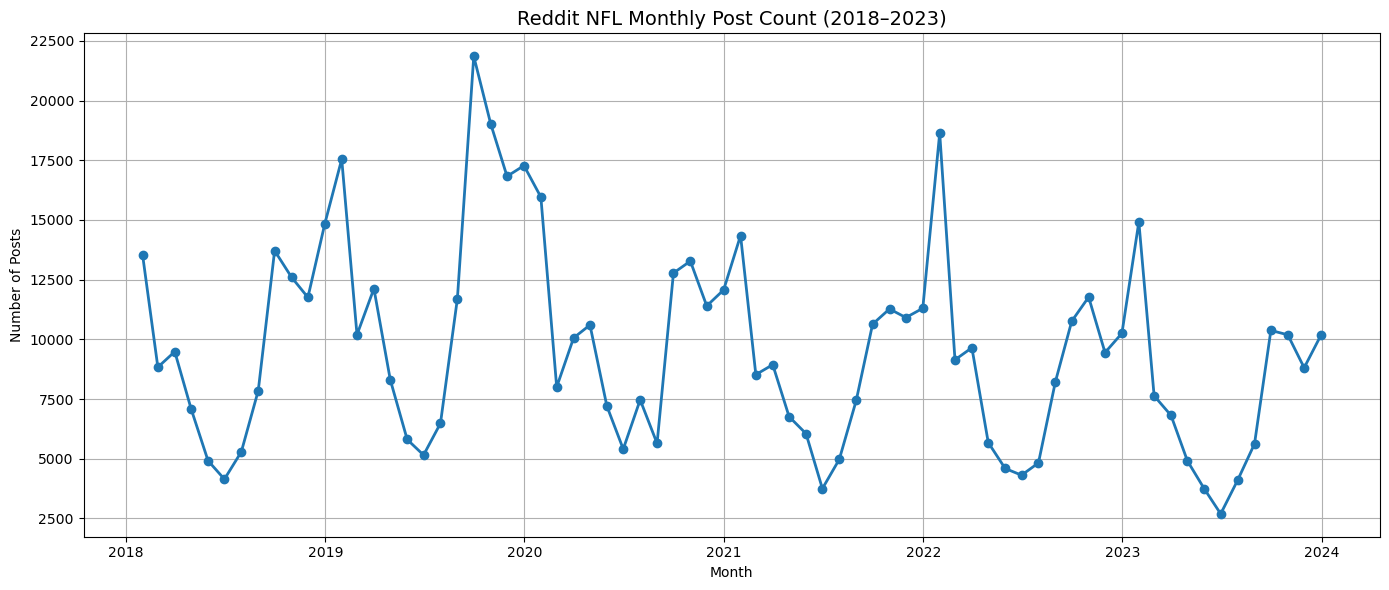

In [12]:
import matplotlib.pyplot as plt

# Convert 'created_utc' from UNIX timestamp to datetime
df_useful['created_dt'] = pd.to_datetime(df_useful['created_utc'], unit='s')

# Set datetime as index to enable time-based resampling
df_useful.set_index('created_dt', inplace=True)

# Resample to get the number of posts per month
monthly_posts = df_useful.resample('M').size()

# Plot the time series of post count
plt.figure(figsize=(14, 6))
plt.plot(monthly_posts.index, monthly_posts.values, marker='o', linewidth=2)
plt.title("Reddit NFL Monthly Post Count (2018–2023)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
df_useful

,id,title,selftext,created_utc,score,num_comments,subreddit,author,author_flair_text,link_flair_text,is_self,is_video,spoiler,stickied,locked
created_dt,,,,,,,,,,,,,,,
2018-01-01 00:05:20,7nbytq,Jason Witten will return in 2018. He is not re...,,1514765120,313,21,nfl,WheresHarveyDent,Saints - Bandwagon,None,False,False,False,False,False
2018-01-01 00:08:13,7nbzct,Alex Collins TD run vs the Bengals,[deleted],1514765293,3,0,nfl,[deleted],None,None,False,False,False,False,False
2018-01-01 00:09:21,7nbzlq,NFL Sack Leader Chandler Jones has broken the ...,,1514765361,253,41,nfl,Stingerr,Cardinals,None,False,False,False,False,False
2018-01-01 00:10:34,7nbzvl,Which team am I referring too?,[removed],1514765434,1,0,nfl,[deleted],None,None,True,False,False,False,False
2018-01-01 00:10:57,7nbzxx,Video of the scuffle between Miami and Buffalo,,1514765457,39,32,nfl,CrankDatSpookyBoi,None,None,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:47:25,18vk8ji,[Lombardi] The 49ers are the first team in NFL...,,1704066445,748,117,nfl,LuskSGV,:Colts: Colts,None,False,False,False,False,False
2023-12-31 23:48:48,18vk9ff,https://www.reddit.com/r/nfl/s/XA8Pb5rsCF,"Now that the number 1 picks is set, a look bac...",1704066528,1,1,nfl,HopLegion,:Bears: Bears,None,True,False,False,False,False
2023-12-31 23:50:13,18vkad7,A look back at r/NFL predictions on who would ...,,1704066613,43,50,nfl,HopLegion,:Bears: Bears,None,False,False,False,False,False


In [4]:
import pandas as pd

df_useful = pd.read_csv("dat/reddit_useful_2018_2023.csv")
# Read the NFL season calendar CSV file
calendar_df = pd.read_csv("dat/season_week_calendar.csv")


# Ensure start_date and end_date in calendar_df are in datetime format
calendar_df['start_date'] = pd.to_datetime(calendar_df['start_date'])
calendar_df['end_date'] = pd.to_datetime(calendar_df['end_date'])

# Ensure created_dt in df_useful is in datetime format
df_useful['created_dt'] = pd.to_datetime(df_useful['created_utc'], unit='s')

# Define a function that finds the corresponding season and week
def map_season_week(created_dt):
    match = calendar_df[
        (calendar_df['start_date'] <= created_dt) &
        (calendar_df['end_date'] >= created_dt)
    ]
    if not match.empty:
        return pd.Series({
            'season': match.iloc[0]['season'],
            'week': match.iloc[0]['week']
        })
    else:
        return pd.Series({'season': None, 'week': None})

# Apply the function to the Reddit dataset
df_useful[['season', 'week']] = df_useful['created_dt'].apply(map_season_week)

# ✅ df_useful now includes 'season' and 'week' columns mapped from calendar_df


In [6]:
df_useful[['season', 'week']] = df_useful[['season', 'week']].fillna(0).astype(int)
print(df_useful[['season', 'week']].dtypes)


season    int64
week      int64
dtype: object


In [7]:
df_useful['full_text'] = df_useful['title'].fillna('') + " " + df_useful['selftext'].fillna('')

In [10]:
qb_data = pd.read_csv("qb_stats.csv")

In [11]:
qb_data

,season,week,gsis_id,full_name,team,position,birth_date,height,weight,years_exp,...,fumble_not_forced,tackled_for_loss,fumble_lost,sack,penalties,penalty_yards,qb_dropback,total_epa,avg_epa,cpoe
0,2018,1,00-0019596,Tom Brady,NE,QB,1977-08-03,76,225,18,...,0,0,1,2,42,0,41,4.760194,0.113338,2.007506
1,2018,7,00-0019596,Tom Brady,NE,QB,1977-08-03,76,225,18,...,0,0,0,1,37,0,38,14.334146,0.377214,1.759252
2,2018,9,00-0019596,Tom Brady,NE,QB,1977-08-03,76,225,18,...,0,0,0,2,42,0,37,-2.281923,-0.054331,-2.753611
3,2018,4,00-0019596,Tom Brady,NE,QB,1977-08-03,76,225,18,...,0,0,0,0,34,0,35,11.914712,0.340420,2.450176
4,2018,16,00-0019596,Tom Brady,NE,QB,1977-08-03,76,225,18,...,0,0,1,1,25,0,25,-16.553890,-0.662156,-16.481543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,2023,2,00-0039163,C.J. Stroud,HOU,QB,2001-10-03,75,218,0,...,2,0,1,6,56,0,52,4.817316,0.086024,1.615969
3330,2023,1,00-0039164,Anthony Richardson,IND,QB,2002-05-22,76,232,0,...,0,0,1,4,50,0,45,-9.689542,-0.189991,-7.833981
3331,2023,5,00-0039164,Anthony Richardson,IND,QB,2002-05-22,76,232,0,...,0,0,0,1,15,0,13,1.659495,0.110633,14.394049
3332,2023,4,00-0039164,Anthony Richardson,IND,QB,2002-05-22,76,232,0,...,1,1,1,2,38,0,32,4.846492,0.124269,-16.399486


In [12]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# 初始化情感分析器
analyzer = SentimentIntensityAnalyzer()

# 定義正則表達式來檢查是否為網址
url_pattern = re.compile(r'http[s]?://\S+|www\.\S+')

# 過濾掉網址類型的內容
df_useful['filtered_text'] = df_useful['full_text'].apply(
    lambda x: '' if url_pattern.match(x) else x
)

# 確保過濾後的文字沒有缺失值
df_useful['filtered_text'] = df_useful['filtered_text'].fillna('')

# 對過濾後的文字進行情感分析
df_useful['sentiment_score'] = df_useful['filtered_text'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# 檢查結果
print(df_useful[['full_text', 'filtered_text', 'sentiment_score']].head())

                                           full_text  \
0  Jason Witten will return in 2018. He is not re...   
1       Alex Collins TD run vs the Bengals [deleted]   
2  NFL Sack Leader Chandler Jones has broken the ...   
3           Which team am I referring too? [removed]   
4    Video of the scuffle between Miami and Buffalo    

                                       filtered_text  sentiment_score  
0  Jason Witten will return in 2018. He is not re...           0.0000  
1       Alex Collins TD run vs the Bengals [deleted]           0.0000  
2  NFL Sack Leader Chandler Jones has broken the ...          -0.4767  
3           Which team am I referring too? [removed]           0.0000  
4    Video of the scuffle between Miami and Buffalo            0.0000  


In [13]:
unique_names = qb_data['full_name'].drop_duplicates().tolist()

In [14]:
unique_names

['Tom Brady',
 'Drew Brees',
 'Josh McCown',
 'Matt Schaub',
 'Eli Manning',
 'Ben Roethlisberger',
 'Philip Rivers',
 'Alex Smith',
 'Aaron Rodgers',
 'Derek Anderson',
 'Matt Cassel',
 'Ryan Fitzpatrick',
 'Matt Ryan',
 'Joe Flacco',
 'Chad Henne',
 'Josh Johnson',
 'Matthew Stafford',
 'Chase Daniel',
 'Brian Hoyer',
 'Mark Sanchez',
 'Colt McCoy',
 'Sam Bradford',
 'Cam Newton',
 'Blaine Gabbert',
 'Andy Dalton',
 'Tyrod Taylor',
 'Case Keenum',
 'Russell Wilson',
 'Nick Foles',
 'Kirk Cousins',
 'Robert Griffin III',
 'Andrew Luck',
 'Brandon Weeden',
 'Brock Osweiler',
 'Ryan Tannehill',
 'Mike Glennon',
 'Matt Barkley',
 'Geno Smith',
 'Teddy Bridgewater',
 'Derek Carr',
 'AJ McCarron',
 'Jimmy Garoppolo',
 'Garrett Gilbert',
 'Blake Bortles',
 'Jameis Winston',
 'Taylor Heinicke',
 'Sean Mannion',
 'Marcus Mariota',
 'Jeff Driskel',
 'Nate Sudfeld',
 'Carson Wentz',
 'Dak Prescott',
 'Cody Kessler',
 'Jared Goff',
 'Jacoby Brissett',
 'Nick Mullens',
 'Taysom Hill',
 'Deshaun W

In [15]:
# 定義函數來檢查匹配的名稱
def find_matching_players(text, names):
    matches = [name for name in names if name.lower() in text.lower()]
    return matches if matches else None

# 檢查每行的匹配結果
df_useful['matched_players'] = df_useful['filtered_text'].apply(
    lambda x: find_matching_players(x, unique_names)
)

# 檢查結果
print(df_useful[['filtered_text', 'matched_players']].head())

                                       filtered_text matched_players
0  Jason Witten will return in 2018. He is not re...            None
1       Alex Collins TD run vs the Bengals [deleted]            None
2  NFL Sack Leader Chandler Jones has broken the ...            None
3           Which team am I referring too? [removed]            None
4    Video of the scuffle between Miami and Buffalo             None


In [17]:
# 計算有匹配到的行數
matched_count = df_useful['matched_players'].notnull().sum()

# 計算總行數
total_count = len(df_useful)

# 計算匹配比例
matched_ratio = matched_count / total_count

# 輸出結果
print(f"Matched rows: {matched_count}")
print(f"Total rows: {total_count}")
print(f"Matched ratio: {matched_ratio:.2%}")

Rows with multiple matched players: 20238
Total rows: 688324
Percentage of rows with multiple matches: 2.94%
                                         filtered_text  \
50   Drew Brees has set the record for single seaso...   
57   Drew Brees has set the record for single seaso...   
78   With another 4th quarter TD today, Russell Wil...   
263  Who had a bigger drop off this season: Russell...   
425  Active QB's among all-time passing leaders: Br...   

                                       matched_players  num_matched_players  
50                          [Drew Brees, Sam Bradford]                    2  
57                          [Drew Brees, Sam Bradford]                    2  
78                       [Eli Manning, Russell Wilson]                    2  
263                       [Russell Wilson, Derek Carr]                    2  
425  [Matt Schaub, Alex Smith, Ryan Fitzpatrick, Ma...                    5  


In [18]:
# 計算每行匹配到的名字數量
df_useful['num_matched_players'] = df_useful['matched_players'].apply(
    lambda x: len(x) if x else 0
)

# 篩選出匹配超過一個名字的行
multiple_matches = df_useful[df_useful['num_matched_players'] > 1]

# 統計匹配超過一個名字的行數
multiple_matches_count = len(multiple_matches)

# 總行數
total_count = len(df_useful)

# 輸出結果
print(f"Rows with multiple matched players: {multiple_matches_count}")
print(f"Total rows: {total_count}")
print(f"Percentage of rows with multiple matches: {multiple_matches_count / total_count:.2%}")

# 如果需要查看這些行，可以輸出
print(multiple_matches[['filtered_text', 'matched_players', 'num_matched_players']].head())

Rows with multiple matched players: 20238
Total rows: 688324
Percentage of rows with multiple matches: 2.94%
                                         filtered_text  \
50   Drew Brees has set the record for single seaso...   
57   Drew Brees has set the record for single seaso...   
78   With another 4th quarter TD today, Russell Wil...   
263  Who had a bigger drop off this season: Russell...   
425  Active QB's among all-time passing leaders: Br...   

                                       matched_players  num_matched_players  
50                          [Drew Brees, Sam Bradford]                    2  
57                          [Drew Brees, Sam Bradford]                    2  
78                       [Eli Manning, Russell Wilson]                    2  
263                       [Russell Wilson, Derek Carr]                    2  
425  [Matt Schaub, Alex Smith, Ryan Fitzpatrick, Ma...                    5  


In [19]:
# 展開 matched_players 列表
df_exploded = df_useful.explode('matched_players')

# 按展開後的球員名稱進行分組
player_week_sentiment = df_exploded.groupby(
    ['matched_players', 'season', 'week']
)['sentiment_score'].agg(['mean', 'count']).reset_index()

# 重命名列
player_week_sentiment.rename(columns={'mean': 'avg_sentiment_score', 'count': 'num_mentions'}, inplace=True)

In [22]:
df_exploded.to_csv("dat/reddit_exploded_2018_2023.csv", index=False, encoding="utf-8")

In [20]:
player_week_sentiment

,matched_players,season,week,avg_sentiment_score,num_mentions
0,AJ McCarron,0,0,0.296057,168
1,AJ McCarron,2018,2,0.772200,1
2,AJ McCarron,2018,6,0.000000,1
3,AJ McCarron,2018,8,-0.107050,2
4,AJ McCarron,2018,9,0.000000,3
...,...,...,...,...,...
7546,Zach Wilson,2023,13,0.001438,13
7547,Zach Wilson,2023,14,0.240200,24
7548,Zach Wilson,2023,15,-0.094547,19
7549,Zach Wilson,2023,16,-0.184300,3


In [23]:
player_week_sentiment.to_csv("dat/player_week_sentiment.csv", index=False, encoding="utf-8")

C:\Users\Shang Yi Lin\AppData\Local\Temp\ipykernel_5456\345976706.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tom_brady_data['season_week'] = tom_brady_data['season'].astype(str) + '-' + tom_brady_data['week'].astype(str)


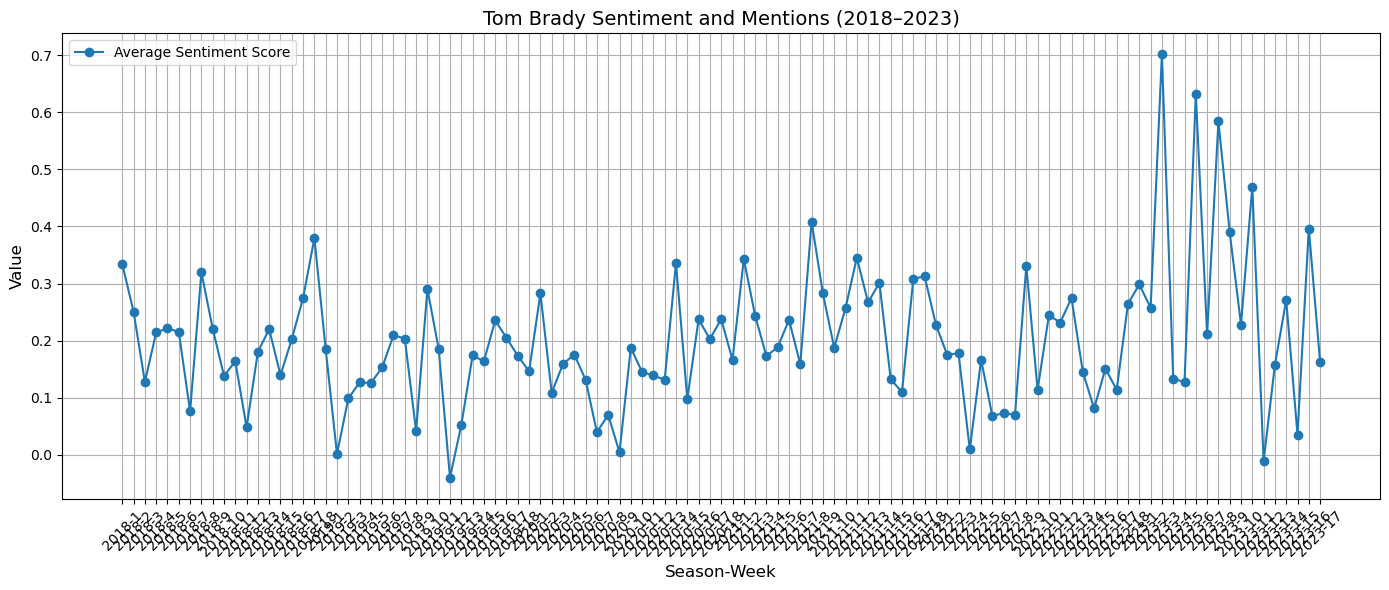

In [26]:
import matplotlib.pyplot as plt

# 排除 season 和 week 為 0 的資料
filtered_data = player_week_sentiment[
    (player_week_sentiment['season'] != 0) & (player_week_sentiment['week'] != 0)
]

# 篩選出 Tom Brady 的資料
tom_brady_data = filtered_data[filtered_data['matched_players'].str.lower() == 'tom brady']

# 新增一個欄位作為 x 軸標籤，格式為 "season-week"
tom_brady_data['season_week'] = tom_brady_data['season'].astype(str) + '-' + tom_brady_data['week'].astype(str)

# 繪製 avg_sentiment_score 和 num_mentions 的折線圖
plt.figure(figsize=(14, 6))

# 繪製 avg_sentiment_score
plt.plot(
    tom_brady_data['season_week'], 
    tom_brady_data['avg_sentiment_score'], 
    label='Average Sentiment Score', 
    marker='o'
)


# 添加標題和標籤
plt.title("Tom Brady Sentiment and Mentions (2018–2023)", fontsize=14)
plt.xlabel("Season-Week", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=45)  # 旋轉 x 軸標籤以避免重疊
plt.legend()
plt.grid(True)
plt.tight_layout()

# 顯示圖表
plt.show()